# Problem Set-Up

In [1]:
%pylab inline

import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Perfect sensor
def sense(x):
    return x

In [3]:
def simulate(Δt, p, u):
    p += Δt * u
    return p

In [4]:
### P-controller adjusted Control Policy
def Pcontrol(t, y, p_d):
    k = 20 # Scaling factor
    u = k*(p_d - y)
    return array([u[0], u[1]])

In [5]:
def animate(t):
    ax.clear()
    
    # Path
    plot(p_log[:,0], p_log[:,1], 'r--')
    
    # Initial conditions
    plot(p_log[t,0], p_log[t,1], 'bo')

# Question 1: Rotated Ellipse Control Policy

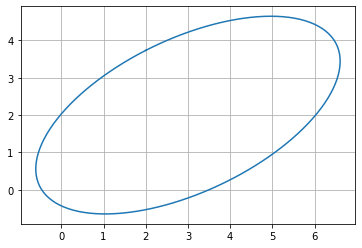

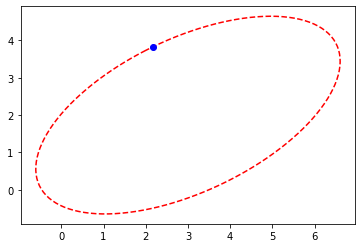

In [6]:
tf = 2*pi    # Simulation time
Δt = 0.05    # Time step
time = linspace(0,tf, int(tf / Δt) + 1)  # Time interval

## Initial Conditions
p = array([-2*sqrt(3)*sin(0) - cos(0) + 3, -2*sin(0) + sqrt(3)*cos(0) + 2]) #robot location (t=0)
p_log = [copy(p)]

## Update position array for each time (t)
for t in time:
    y = sense(p)
    
    # Desired point to achieve (changes based on equation which is a function of t)
    p_d = [-2*sqrt(3)*sin(t) - cos(t) + 3, -2*sin(t) + sqrt(3)*cos(t) + 2]
    
    # Implement P-Controller to find policy, progress and update position array
    u = Pcontrol(t, y, p_d)
    p = simulate(Δt, p, u)
    p_log.append(copy(p))
p_log = array(p_log)


## Plotting controls
grid()
plot(p_log[:,0], p_log[:,1])
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())